# Data Analysis: lecture 4

In [ ]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Doing the previous steps
df = pd.read_csv('imports-85.data', header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

# replace ? with nan
df.replace('?', np.nan, inplace=True)

#function to fill the missing value

def fillmissing_numeric(table, col_name):
    table[col_name] = table[col_name].astype('float64')
    table[col_name].fillna(table[col_name].mean(), inplace=True)
    
def fillmissing_object(table, col_name):
    table[col_name] = table[col_name].astype('object')
    table[col_name].fillna(table[col_name].value_counts().idxmax(), inplace=True)
    
# fill the numeric values
fillmissing_numeric(df, 'normalized-losses')
fillmissing_numeric(df, 'bore')
fillmissing_numeric(df, 'stroke')
fillmissing_numeric(df, 'horsepower')
fillmissing_numeric(df, 'peak-rpm')
fillmissing_numeric(df, 'stroke')

#fill the categorical values
fillmissing_object(df, 'num-of-doors')

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

df['price'] = df['price'].astype('float64')

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


**EDA continues**

## Analysis of variance test (ANOVA test)

> Indented block

> Indented block





Analyzing the categorical variables and observe the correlation between different catagories

For our car price prediction, let's answer the question <font color='red'>How different make feature has impact on price?</font>

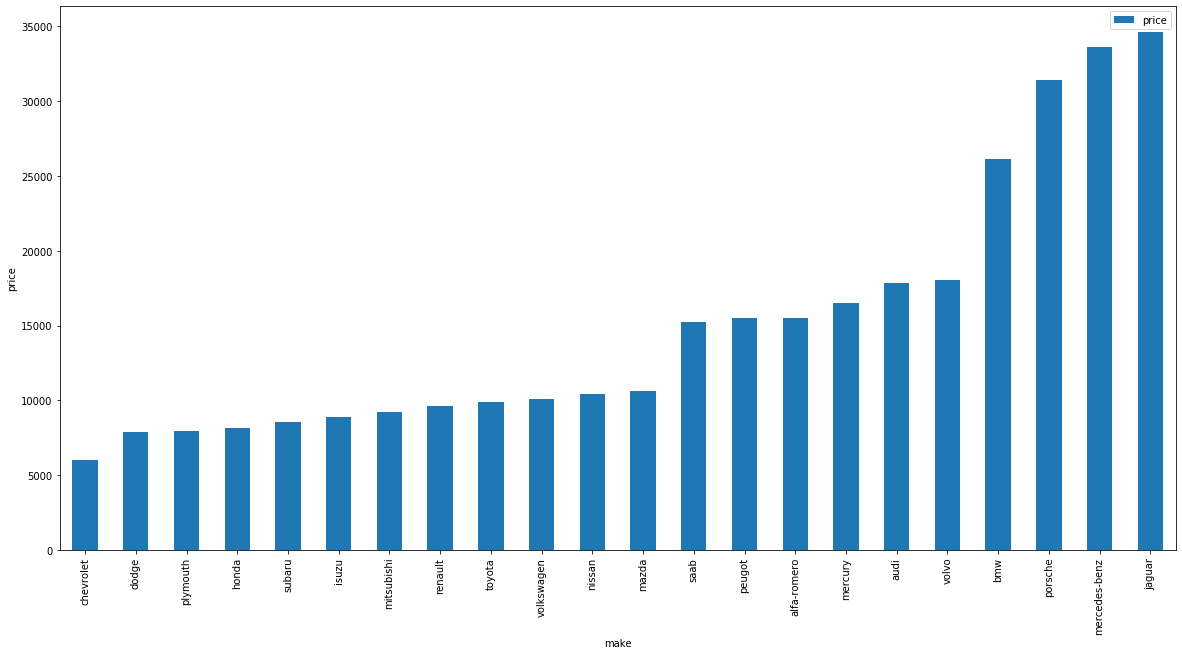

In [ ]:
# visualizing the average price of the cars for different make feature or brands
mean_price = df[['make', 'price']].groupby('make').mean()
mean_price.sort_values(by='price', ascending=True, inplace=True)
mean_price.plot(kind='bar', figsize=(20,10))
plt.ylabel('price')
plt.show()

ANOVA test will determine which of the make feature has the most impact on price and which has the least

ANOVA returns 2 values:

1. F-score: ratio of variance of mean between two groups and variance among the groups themselves
2. P-value: Level of confidence in the F score.

**The following example is taken from cognitive class**

![](ANOVA1.png)

small / large == tiny value

![](ANOVA2.png)

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

**How is the ANOVA score for make feature?**

In [ ]:
from scipy import stats

In [ ]:
grouped_test = df[['make', 'price']].groupby(['make'])

In [ ]:
df.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

In [ ]:
stats.f_oneway(grouped_test.get_group('dodge')['price'], 
              grouped_test.get_group('jaguar')['price'])

F_onewayResult(statistic=337.754207049018, pvalue=4.897882215854236e-09)

In [ ]:
stats.f_oneway(grouped_test.get_group('dodge')['price'], 
              grouped_test.get_group('audi')['price'])

F_onewayResult(statistic=47.22043308555285, pvalue=1.132534640837571e-05)

In [ ]:
stats.f_oneway(grouped_test.get_group('mercury')['price'], 
              grouped_test.get_group('audi')['price'])

F_onewayResult(statistic=0.1322641925486184, pvalue=0.7309673539699819)

**Let's check ANOVA for the drive-wheel feature**

In [ ]:
grouped_test = df[['drive-wheels', 'price']].groupby(['drive-wheels'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('fwd')['price'], 
                              grouped_test.get_group('rwd')['price'], 
                              grouped_test.get_group('4wd')['price'])  

In [ ]:
f_val

67.95406500780399

In [ ]:
p_val

3.3945443577151245e-23

In [ ]:
stats.f_oneway?

**Let's take a look, seperately**

In [ ]:
f_val, p_val = stats.f_oneway(grouped_test.get_group('fwd')['price'], 
                              grouped_test.get_group('rwd')['price'])
print("The F score is {} and p-value is {}".format(f_val, p_val))

The F score is 130.5533160959111 and p-value is 2.2355306355677845e-23


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test.get_group('fwd')['price'], 
                              grouped_test.get_group('4wd')['price'])
print("The F score is {} and p-value is {}".format(f_val, p_val))

The F score is 0.6654657502523033 and p-value is 0.41620116697845666


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test.get_group('rwd')['price'], 
                              grouped_test.get_group('4wd')['price'])
print("The F score is {} and p-value is {}".format(f_val, p_val))

The F score is 8.580681368924756 and p-value is 0.004411492211225333


In [ ]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

## Relationship between 2 categorical variables: chi-squared test

In [ ]:
dataset=sns.load_dataset('tips')
dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
def chi_sq_test(DF, var1, var2):
    dataset_table = pd.crosstab(DF[var1], DF[var2])
    print('contingency table between {} and {} is:\n'.format(var1, var2))
    print(dataset_table)
    val = stats.chi2_contingency(dataset_table)
    Observed_Values = dataset_table.values 
    Expected_Values = val[-1]
    no_of_rows = dataset_table.shape[0]
    no_of_columns = dataset_table.shape[1]
    ddof = (no_of_rows-1)*(no_of_columns-1)
    print("\nDegree of Freedom:-",ddof)
    alpha = 0.05
    chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values, Expected_Values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    critical_value = stats.chi2.ppf(q=1-alpha,df=ddof)
    p_value = 1-stats.chi2.cdf(x=chi_square_statistic,df=ddof)
    
    if chi_square_statistic>=critical_value and p_value<=alpha:
        print("chi_square_statistic is {} and p-value is {}. So, there is a relationship between 2 categorical variables".format(chi_square_statistic, p_value))
    elif chi_square_statistic>=critical_value and p_value>alpha:
        print("chi_square_statistic is {} and p-value is {}. So, there is a weak relationship between 2 categorical variables, but not evident enough".format(chi_square_statistic, p_value))
    else:
        print("chi_square_statistic is {} and p-value is {}. So, these 2 variables are not related at all.".format(chi_square_statistic, p_value))

In [ ]:
chi_sq_test(dataset, 'sex', 'day')

contingency table between sex and day is:

day     Thur  Fri  Sat  Sun
sex                        
Male      30   10   59   58
Female    32    9   28   18

Degree of Freedom:- 3
chi_square_statistic is 8.01732385134847 and p-value is 0.04565502741933891. So, there is a relationship between 2 categorical variables


In [ ]:
chi_sq_test(dataset, 'sex', 'smoker')

contingency table between sex and smoker is:

smoker  Yes  No
sex            
Male     60  97
Female   33  54

Degree of Freedom:- 1
chi_square_statistic is 0.001934818536627623 and p-value is 0.964915107315732. So, these 2 variables are not related at all.


In [ ]:
chi_sq_test(df, 'fuel-type', 'make')

contingency table between fuel-type and make is:

make       alfa-romero  audi  bmw  chevrolet  dodge  honda  isuzu  jaguar  \
fuel-type                                                                   
diesel               0     0    0          0      0      0      0       0   
gas                  3     6    8          3      9     13      2       3   

make       mazda  mercedes-benz  ...  nissan  peugot  plymouth  porsche  \
fuel-type                        ...                                      
diesel         2              4  ...       1       5         0        0   
gas           15              4  ...      17       6         7        4   

make       renault  saab  subaru  toyota  volkswagen  volvo  
fuel-type                                                    
diesel           0     0       0       3           4      1  
gas              2     6      12      29           8     10  

[2 rows x 22 columns]

Degree of Freedom:- 21
chi_square_statistic is 0.9944751381215469 an

In [ ]:
chi_sq_test(df, 'fuel-type', 'aspiration')

contingency table between fuel-type and aspiration is:

aspiration  std  turbo
fuel-type             
diesel        7     13
gas         158     23

Degree of Freedom:- 1
chi_square_statistic is 33.496718985434455 and p-value is 7.138430957454034e-09. So, there is a relationship between 2 categorical variables


## More visualization on EDA

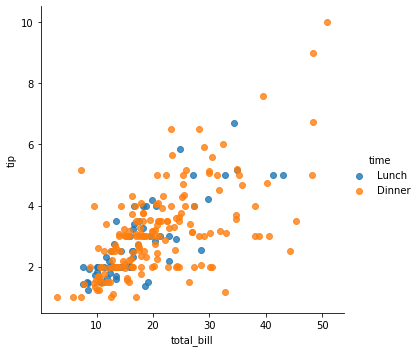

In [ ]:
#lm plot
sns.lmplot(x='total_bill', y='tip', data=dataset,
           fit_reg=False, # No regression line
           hue='time')
plt.show()

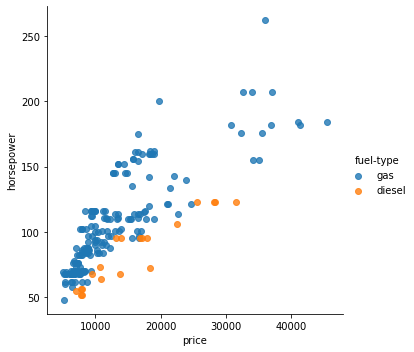

In [ ]:
sns.lmplot(x='price', y='horsepower', data=df,
           fit_reg=False, # No regression line
           hue='fuel-type')

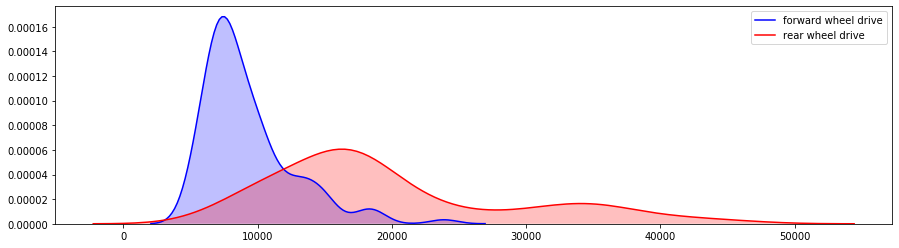

In [ ]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['drive-wheels'] == 'fwd'),'price'] , color='b',shade=True, label='forward wheel drive')
ax=sns.kdeplot(df.loc[(df['drive-wheels'] == 'rwd'),'price'] , color='r',shade=True, label='rear wheel drive')

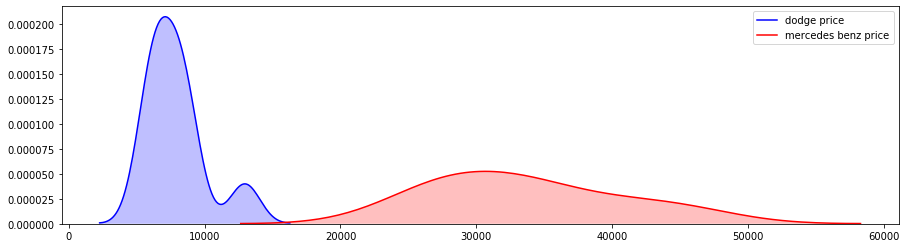

In [ ]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['make'] == 'dodge'),'price'] , color='b',shade=True, label='dodge price')
ax=sns.kdeplot(df.loc[(df['make'] == 'mercedes-benz'),'price'] , color='r',shade=True, label='mercedes benz price')